# K-Means, Hierarchical and GMM Clustering

## Creating the feature vector and normalizing it to use through our code

In [464]:
# For plots and figures
from matplotlib import image
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import cv2

# for matrix manipulations
import numpy as np
import pandas as pd 

# For scaling
from sklearn.preprocessing import MinMaxScaler


# for Clustering
from sklearn.decomposition import PCA
# for t-SNE
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
import scipy.cluster.hierarchy 
from sklearn.mixture import GaussianMixture

In [2]:
images =[]
plane,bird = '3096_colorPlane.jpg','42049_colorBird.jpg'
images.append(image.imread(plane))
images.append(image.imread(bird))
# Check the dimensions of the image
print('Image Plane: {} and Image Bird: {} '.format(images[0].shape,images[1].shape))

Image Plane: (321, 481, 3) and Image Bird: (321, 481, 3) 


In [3]:
## Creating a feture matrix 
# - By verticaly arranging the data as a DataFrame
# - Adding the vertical and horizontal values over the data frame
data_plane = images[0]
size_plane=(data_plane.shape[0],data_plane.shape[1])
array_transformed_plane = np.moveaxis(np.indices(size_plane),0,2)
array_final_transformed_plane = np.dstack((array_transformed_plane, data_plane)).reshape((-1,5))

data_bird = images[1]
size_bird=(data_bird.shape[0],data_bird.shape[1])
array_transformed = np.moveaxis(np.indices(size_bird),0,2)
array_final_transformed_bird = np.dstack((array_transformed, data_bird)).reshape((-1,5))

image_matrix_plane = pd.DataFrame(array_final_transformed_plane, columns=["v","h","r_val","g_val","b_val"])
print('Plane Matrix: \n',image_matrix_plane.head(),'\n \n \n ...',image_matrix_plane.tail())

image_matrix_bird = pd.DataFrame(array_final_transformed_bird, columns=["v","h","r_val","g_val","b_val"])
print('\n Bird Matrix: \n',image_matrix_bird.head(),'\n \n \n ...',image_matrix_bird.tail())


Plane Matrix: 
    v  h  r_val  g_val  b_val
0  0  0    138    138    148
1  0  1    138    138    148
2  0  2    138    138    148
3  0  3    137    137    147
4  0  4    137    137    147 
 
 
 ...           v    h  r_val  g_val  b_val
154396  320  476     85     98    115
154397  320  477     86     99    116
154398  320  478     84     97    114
154399  320  479     80     93    110
154400  320  480     54     64     74

 Bird Matrix: 
    v  h  r_val  g_val  b_val
0  0  0     59     87    111
1  0  1     60     88    112
2  0  2     61     89    113
3  0  3     63     91    115
4  0  4     65     93    117 
 
 
 ...           v    h  r_val  g_val  b_val
154396  320  476     44     54     55
154397  320  477     45     50     54
154398  320  478     27     27     35
154399  320  479     29     27     38
154400  320  480     88    102    128


In [4]:
## Normalization of the Data
from sklearn.preprocessing import MinMaxScaler
scaler_plane = MinMaxScaler()
scaler_bird = MinMaxScaler()
# For plane
scaler_plane.fit(image_matrix_plane)
normalized_matrix_plane = scaler_plane.transform(image_matrix_plane)

# For Bird
scaler_bird.fit(image_matrix_plane)
normalized_matrix_bird = scaler_bird.transform(image_matrix_bird)

colName= ['v','h','R_val','G_val','B_val']
# For plane
normalized_matrix_plane = pd.DataFrame(normalized_matrix_plane)
# For bird
normalized_matrix_bird = pd.DataFrame(normalized_matrix_bird)
normalized_matrix_plane.columns = colName
normalized_matrix_bird.columns = colName
print('plane data normalised: \n',normalized_matrix_plane.head())
print('\n bird data normalised: \n',normalized_matrix_bird.head())

plane data normalised: 
      v         h     R_val     G_val     B_val
0  0.0  0.000000  0.750000  0.754098  0.826816
1  0.0  0.002083  0.750000  0.754098  0.826816
2  0.0  0.004167  0.750000  0.754098  0.826816
3  0.0  0.006250  0.744565  0.748634  0.821229
4  0.0  0.008333  0.744565  0.748634  0.821229

 bird data normalised: 
      v         h     R_val     G_val     B_val
0  0.0  0.000000  0.320652  0.475410  0.620112
1  0.0  0.002083  0.326087  0.480874  0.625698
2  0.0  0.004167  0.331522  0.486339  0.631285
3  0.0  0.006250  0.342391  0.497268  0.642458
4  0.0  0.008333  0.353261  0.508197  0.653631


## 1.K-Means Clustering
### *Getting the optimal k value using ELBOW METHOD*

In [6]:
def find_optimal_k(std_data,type):
    loss = []
    k = list(range(2, 15))
    for noc in k:
        model = KMeans(n_clusters = noc)
        model.fit(std_data)
        loss.append(model.inertia_)
    plt.plot(k, loss, "-o")
    plt.title("{} Image:Elbow method to choose k".format(type))
    plt.xlabel("K")
    plt.ylabel("Loss")
    plt.grid()
    plt.show()

### Plotting the graphs for the ELBOW METHOD

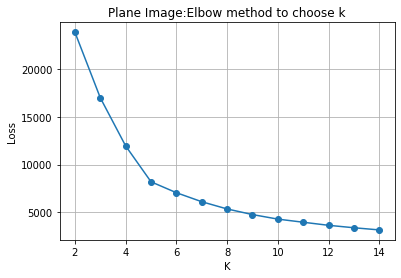

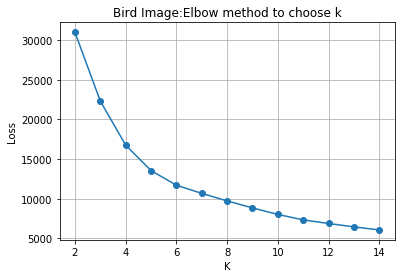

In [7]:
find_optimal_k(normalized_matrix_plane,'Plane')
find_optimal_k(normalized_matrix_bird,'Bird')


### `Observation:`
- #### Plane Image
**The optimal value for each of the images seems to be around the knee value which is at k=5**
- #### Bird Image
**The optimal value for each of the images seems to be around the knee value which is around k=4 or k=5**


## Now, fitting the model with optimum k found above

In [8]:
# Plane Image
k_means_plane = KMeans(n_clusters=5)
km_fit_plane= k_means_plane.fit(normalized_matrix_plane)

In [9]:
# Bird Image
k_means_bird = KMeans(n_clusters=5)
km_fit_bird= k_means_bird.fit(normalized_matrix_bird)

In [10]:
plane_km_pred = k_means_plane.predict(normalized_matrix_plane)
bird_km_pred = km_fit_bird.predict(normalized_matrix_bird)

### Getting the silhouette_score

Common function to get CH and Silhouette Score

In [251]:
def sil_score(data,kmax):    
    sil = []
    cv = []
    # dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
    for k in range(2, kmax+1):
        kmeans = KMeans(n_clusters = k).fit(data)
        labels = kmeans.labels_
        sil.append(silhouette_score(data, labels, metric = 'euclidean'))
        cv.append(calinski_harabasz_score(data,labels))
    return sil,cv

In [252]:
def plot_scores(data,score_type):
    k=[2,3,4,5,6,7,8]
    plt.plot( k,data.score,marker='o')
    plt.xticks(np.arange(min(k), max(k)+1, 1.0))
    plt.xlabel('k-value')
    plt.ylabel(score_type)
    plt.title('{} Vs K'.format(score_type))
    plt.grid()
    plt.show()

- ### PLANE IMAGE

In [466]:
sil_score_plane,ch_score_plane = sil_score(normalized_matrix_plane.sample(12000),8)

In [469]:
sils_plane = pd.DataFrame({'score':sil_score_plane})
ch_plane = pd.DataFrame({'score':ch_score_plane})
print('Silhoutte Scores \n',sils_plane)
print('CH Scores \n',ch_plane)


Silhoutte Scores 
       score
0  0.338995
1  0.348053
2  0.390760
3  0.407638
4  0.378908
5  0.358332
6  0.374308
CH Scores 
          score
0  5983.446610
1  6708.414112
2  8036.413685
3  9984.790115
4  9676.921389
5  9601.194624
6  9665.249319


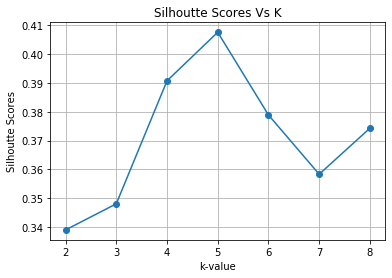

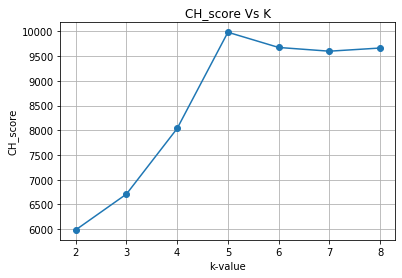

In [470]:
plot_scores(sils_plane,'Silhoutte Scores')
plot_scores(ch_plane,'CH_score')

### `Observation`
- #### Judging by the high Shilouette Score and the peak obtained at k=5 we can say that the cluster value of 5 is most near to an optimal value to be chosen for k.


- ### BIRD

In [471]:
sil_score_bird,ch_score_bird = sil_score(normalized_matrix_bird.sample(7000),8)

In [475]:
# sil_score_bird.head()
sils_bird = pd.DataFrame({'score':sil_score_bird})
ch_bird = pd.DataFrame({'score':ch_score_bird})
print('----silouhette scores--- \n',sils_bird)
print('----CH SCORES----- \n',ch_bird)

----silouhette scores--- 
       score
0  0.558936
1  0.371840
2  0.388013
3  0.400706
4  0.372500
5  0.373738
6  0.360524
----CH SCORES----- 
          score
0  8143.382716
1  6967.805720
2  6864.201480
3  6743.616761
4  6511.665397
5  6105.955723
6  5838.917249


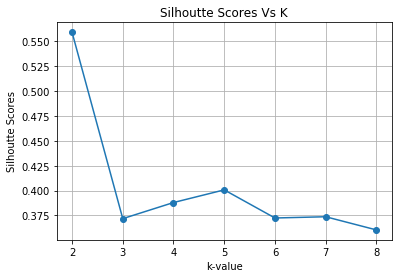

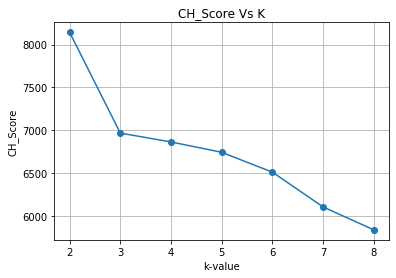

In [476]:
plot_scores(sils_bird,'Silhoutte Scores')
plot_scores(ch_bird,'CH_Score')

## Using pca to visualize the clusters obtained from : K-MEANS

In [347]:

pca = PCA(n_components=3, random_state=0)
reduced_features = pca.fit_transform(normalized_matrix_plane)
reduced_cluster_centers = pca.transform(k_means_plane.cluster_centers_)

NameError: name 'k_means_plane' is not defined

In [12]:
# for the bird image
pca_b = PCA(n_components=3, random_state=0)
reduced_features_b = pca_b.fit_transform(normalized_matrix_bird)
reduced_cluster_centers_b = pca_b.transform(k_means_bird.cluster_centers_)

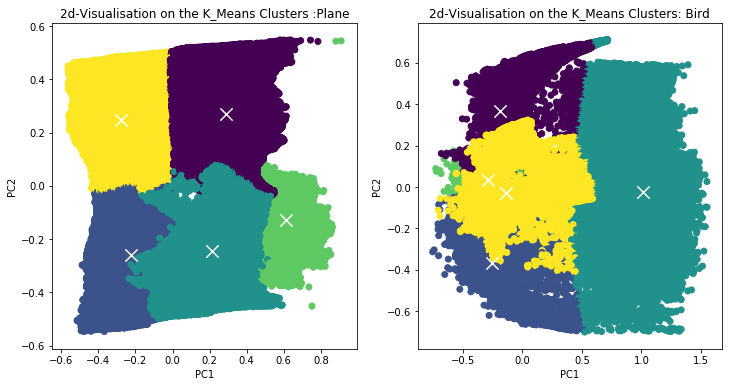

In [13]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(12,6))
ax1.scatter(reduced_features[:,0], reduced_features[:,1], c=plane_km_pred)
ax1.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='white')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.title.set_text('2d-Visualisation on the K_Means Clusters :Plane')

ax2.scatter(reduced_features_b[:,0], reduced_features_b[:,1], c=bird_km_pred)
ax2.scatter(reduced_cluster_centers_b[:, 0], reduced_cluster_centers_b[:,1], marker='x', s=150, c='white')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.title.set_text('2d-Visualisation on the K_Means Clusters: Bird')

# Image Segmentation 
- ### K-Means Segmented Images
- ### RETURNING TO PCA AND TSNE FOR SCATTER PLOTS


In [526]:
# For Plane

def image_segmentation(data,n_cluster):
    print('===============================================================')
#     fig,ax= plt.subplots(4,2)
    kmeans = KMeans(n_clusters=n_cluster).fit(data)
    labels = kmeans.predict(data)
    plt.scatter(data.iloc[:,1],data.iloc[:,0],c=labels)
    plt.gca().invert_yaxis()
    plt.title('(CLUSTERS = {})'.format(n_cluster))    
    plt.show()
# #     PCA  STARTS HERE
    pca = PCA(n_components=2, random_state=0)
    reduced_features = pca.fit_transform(data)
    pca_fit= pd.DataFrame(data= {'pc1':  reduced_features[:,0],'pc2':  reduced_features[:,1]})
    plt.scatter(pca_fit['pc1'],pca_fit['pc2'],c=labels,s=10)
#     plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    plt.title('(PCA: Cluster = {})'.format(n_cluster))
    plt.show()
    
#     TSNE STARTS HERE
    data= data.sample(3500)
    kmeans = KMeans(n_clusters=n_cluster).fit(data)
    labels = kmeans.predict(data)
    model = TSNE(n_components = 2,random_state = 0, perplexity=35.0)
    t_data = model.fit_transform(data)
    df=pd.DataFrame()
    df['tsne1'] = t_data[:,0]
    df['tsne2'] = t_data[:,1]
    plt.scatter(df['tsne1'],df['tsne2'],c=labels)
    plt.title('(TSNE: Cluster = {})'.format(n_cluster))
    plt.show()

FOR PLANE IMAGE 

Number of Clusters :  2


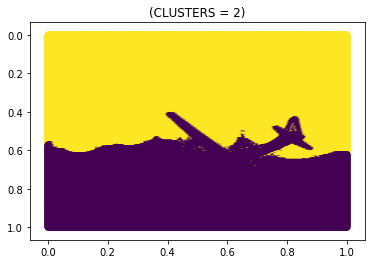

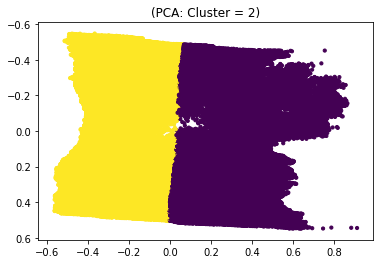

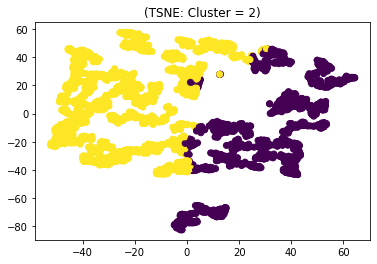

In [527]:
for i in range(2,3):
    print('FOR PLANE IMAGE \n')
    print('Number of Clusters : ',i)
#     plt.gca().invert_yaxis()
    image_segmentation(normalized_matrix_plane,i)

FOR PLANE IMAGE 

Number of Clusters :  2


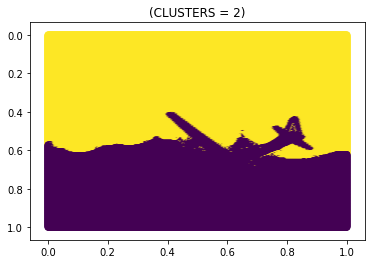

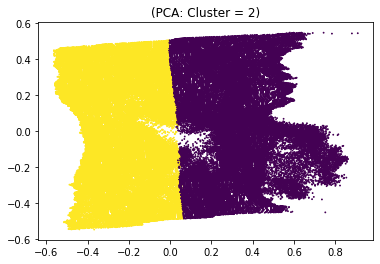

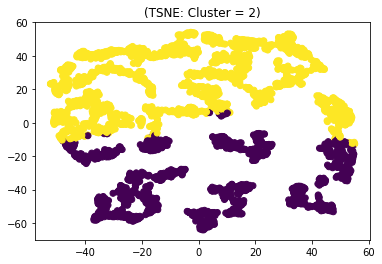

FOR PLANE IMAGE 

Number of Clusters :  3


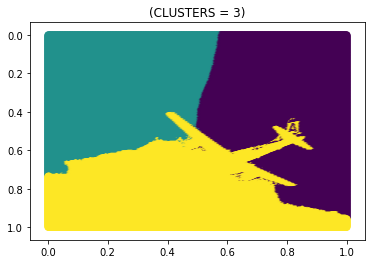

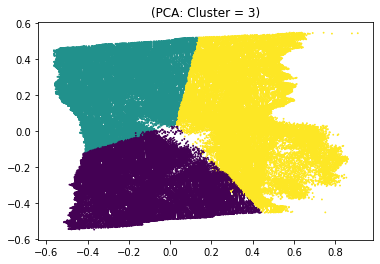

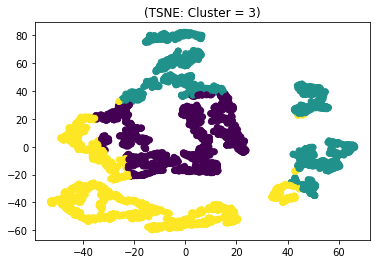

FOR PLANE IMAGE 

Number of Clusters :  4


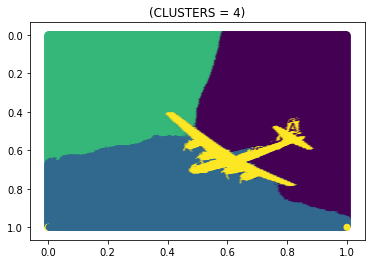

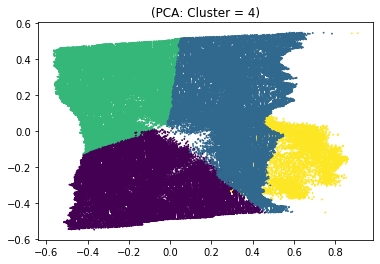

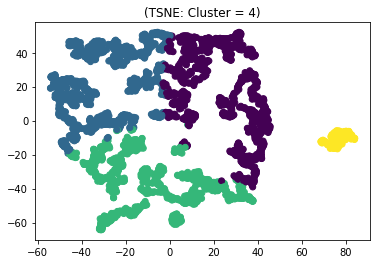

FOR PLANE IMAGE 

Number of Clusters :  5


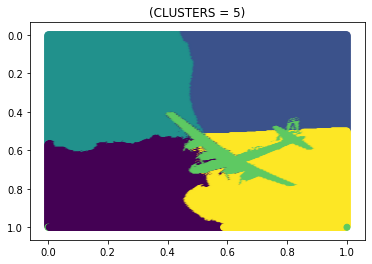

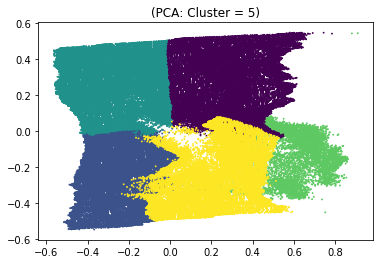

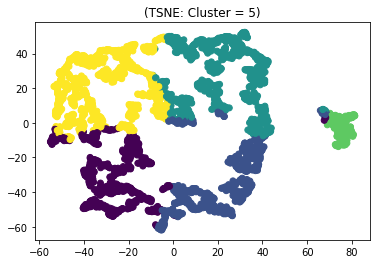

In [432]:
for i in range(2,6):
    print('FOR PLANE IMAGE \n')
    print('Number of Clusters : ',i)
    image_segmentation(normalized_matrix_plane,i)

FOR BIRD IMAGE 

Number of Clusters :  2


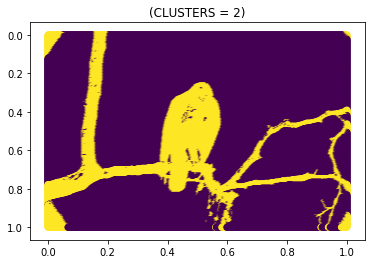

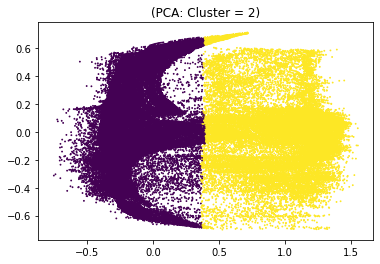

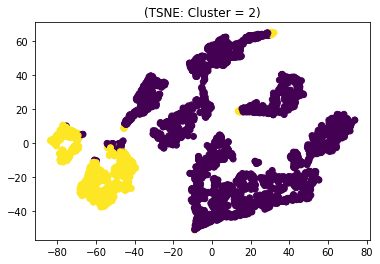

FOR BIRD IMAGE 

Number of Clusters :  3


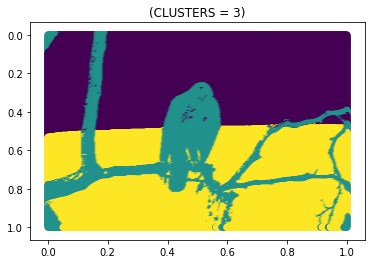

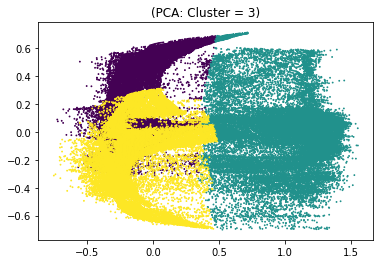

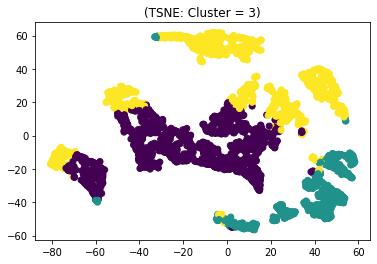

FOR BIRD IMAGE 

Number of Clusters :  4


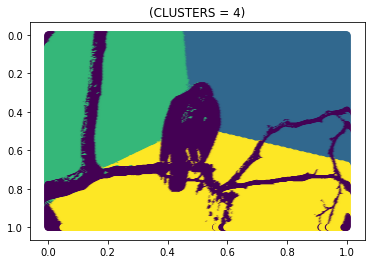

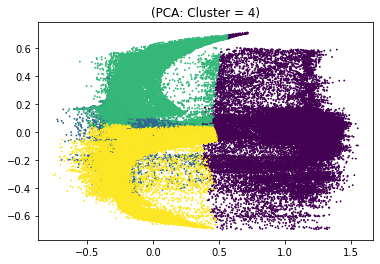

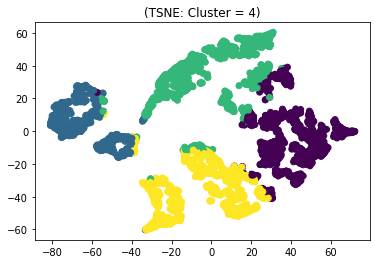

FOR BIRD IMAGE 

Number of Clusters :  5


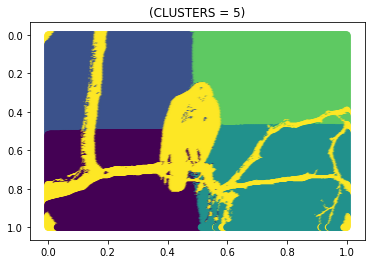

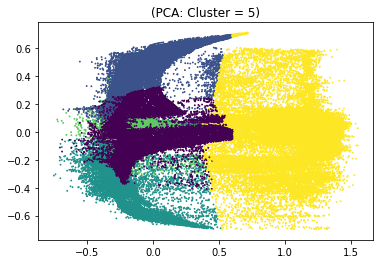

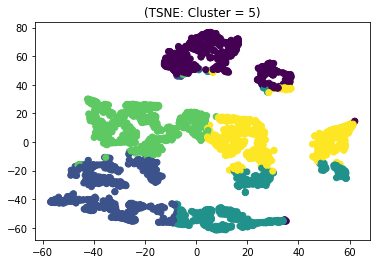

In [433]:
for i in range(2,6):
    print('FOR BIRD IMAGE \n')
    print('Number of Clusters : ',i)
    image_segmentation(normalized_matrix_bird,i)

# 2.GMM Model

 Rather than just randomly setting these values it is usually a good idea to use the results from k_means . 
 This will usually give us a good starting point and can help our model converge faster. Taking the intution from pca and kmeans that the images have probably 5 clusters we take the number of gaussians to be 5.


In [436]:
from sklearn.mixture import GaussianMixture

In [70]:
def sil_score_gmm_func(data,kmax):    
    sil = []
    cv = []
    # dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
    for k in range(2, kmax+1):
        gmm_model = GaussianMixture(n_components=k, covariance_type='spherical')
        model_fit = gmm_model.fit(data)
        labels = gmm_model.predict(data)
        sil.append(silhouette_score(data, labels, metric = 'euclidean'))
        cv.append(calinski_harabasz_score(data,labels))
    return sil,cv

def plot_scores_gmm(data,score_type):
    k=[2,3,4,5,6,7,8]
    plt.plot(k,sil_score_gmm.score,marker='o')
    plt.xticks(np.arange(min(k), max(k)+1, 1.0))
    plt.xlabel('k-value')
#     plt.ylabel(score_type)
#     plt.title('{} Vs K'.format(score_type))
    plt.grid()
    plt.show()

- ### PLANE

In [67]:
sil_score_plane_gmm,ch_score_plane_gmm = sil_score_gmm(normalized_matrix_plane.sample(10000),8)

Silhoutte Scores       score
0  0.333384
1  0.365707
2  0.382349
3  0.418644
4  0.388466
5  0.355940
6  0.359163
CH Scores          score
0  4877.718465
1  4822.295090
2  6522.644836
3  8681.171093
4  8273.847882
5  7670.413575
6  8020.561566


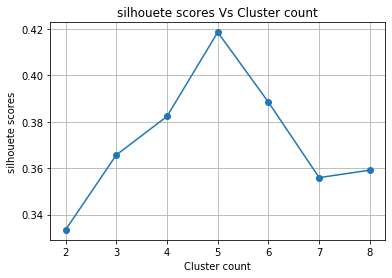

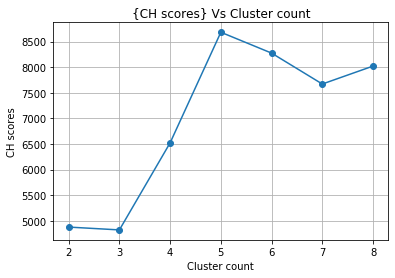

In [68]:
# print(len(ch_score_plane_gmm))
sil_score_gmm = pd.DataFrame({'score':sil_score_plane_gmm})
ch_plane_gmm = pd.DataFrame({'score':ch_score_plane_gmm})
print('Silhoutte Scores',sil_score_gmm)
print('CH Scores',ch_plane_gmm)

k=[2,3,4,5,6,7,8]
plt.plot(k,sil_score_gmm.score,marker='o')
plt.xticks(np.arange(min(k), max(k)+1, 1.0))
plt.xlabel('Cluster count')
plt.ylabel('silhouete scores')
plt.title('silhouete scores Vs Cluster count')
plt.grid()
plt.show()


plt.plot(k,ch_plane_gmm.score,marker='o')
plt.xticks(np.arange(min(k), max(k)+1, 1.0))
plt.xlabel('k-value')
plt.xlabel('Cluster count')
plt.ylabel('CH scores')
plt.title('{CH scores} Vs Cluster count')
plt.grid()
plt.show()

- ### BIRD

In [71]:
sil_score_bird_gmm,ch_score_bird_gmm = sil_score_gmm_func(normalized_matrix_bird.sample(n=10000),8)

In [73]:
sil_score_gmm_b = pd.DataFrame({'score':sil_score_bird_gmm})
ch_plane_gmm_b = pd.DataFrame({'score':ch_score_bird_gmm})
print('Silhoutte Scores \n',sil_score_gmm_b)
print('CH Scores \n',ch_plane_gmm_b)




Silhoutte Scores 
       score
0  0.558943
1  0.374874
2  0.364461
3  0.383559
4  0.350237
5  0.335647
6  0.341722
CH Scores 
           score
0  11383.260390
1   9835.244639
2   8671.997729
3   7978.049995
4   7550.384083
5   7037.372292
6   7112.401460


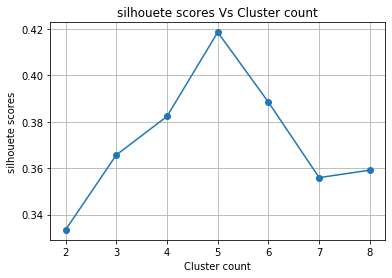

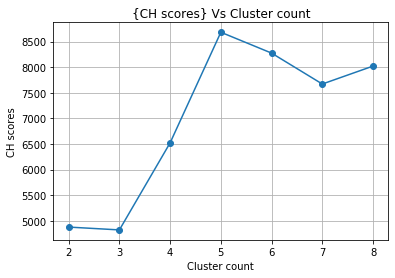

In [74]:
k=[2,3,4,5,6,7,8]
plt.plot(k,sil_score_gmm.score,marker='o')
plt.xticks(np.arange(min(k), max(k)+1, 1.0))
plt.xlabel('Cluster count')
plt.ylabel('silhouete scores')
plt.title('silhouete scores Vs Cluster count')
plt.grid()
plt.show()


plt.plot(k,ch_plane_gmm.score,marker='o')
plt.xticks(np.arange(min(k), max(k)+1, 1.0))
plt.xlabel('k-value')
plt.xlabel('Cluster count')
plt.ylabel('CH scores')
plt.title('{CH scores} Vs Cluster count')
plt.grid()
plt.show()

#### Image Plots for GMM

In [439]:
def image_segmentation_gmm (data,n_cluster):
    gmm_model = GaussianMixture(n_components=n_cluster, covariance_type='spherical')
    model_fit = gmm_model.fit(data)
    labels = gmm_model.predict(data)
    plt.scatter(data.iloc[:,1],-1*data.iloc[:,0],c=labels)
    plt.title('(CLUSTERS = {})'.format(n_cluster))    
    plt.show()
    
# #     PCA  STARTS HERE
    pca = PCA(n_components=2, random_state=0)
    reduced_features = pca.fit_transform(data)
    pca_fit= pd.DataFrame(data= {'pc1': reduced_features[:,0],'pc2': reduced_features[:,1]})
    plt.scatter(pca_fit['pc1'],pca_fit['pc2'],c=labels,s=0.7)
    plt.title('(PCA: Cluster = {})'.format(n_cluster))
    plt.show()
    
#     TSNE STARTS HERE
    data= data.sample(3500)
    gmm_model = GaussianMixture(n_components=n_cluster, covariance_type='spherical')
    model_fit = gmm_model.fit(data)
    labels = gmm_model.predict(data)
    model = TSNE(n_components = 2,random_state = 0, perplexity=35.0)
    t_data = model.fit_transform(data)
    df=pd.DataFrame()
    df['tsne1'] = t_data[:,0]
    df['tsne2'] = t_data[:,1]
    plt.scatter(df['tsne1'],df['tsne2'],c=labels)
    plt.title('(TSNE: Cluster = {})'.format(n_cluster))
    plt.show()

### PLANE

GMM MODEL 
Number pf Clusters: 2


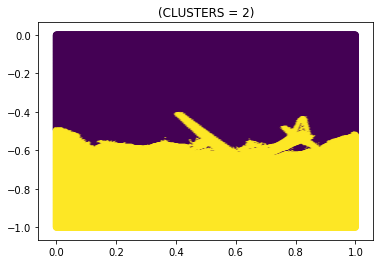

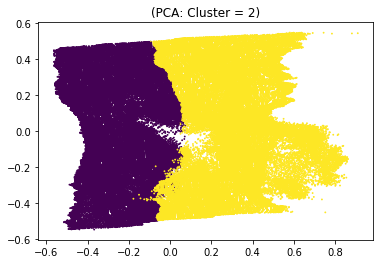

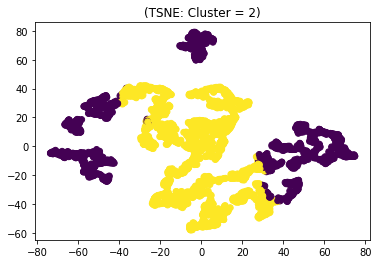

Number pf Clusters: 3


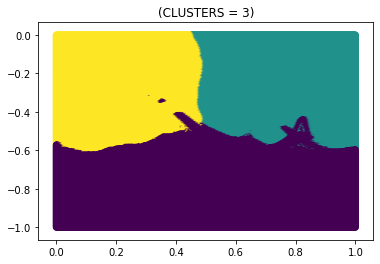

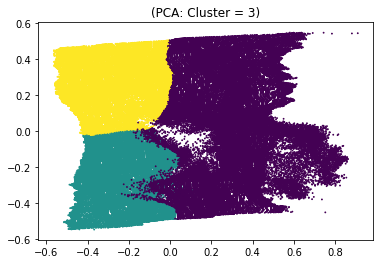

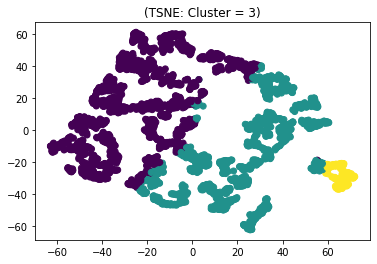

Number pf Clusters: 4


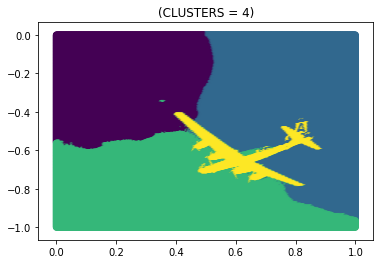

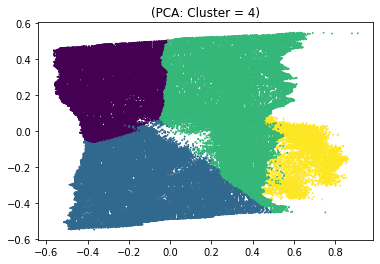

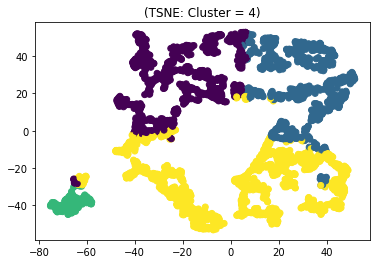

Number pf Clusters: 5


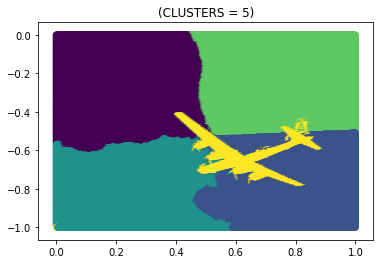

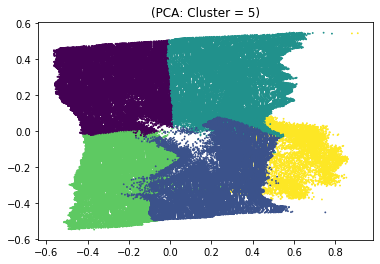

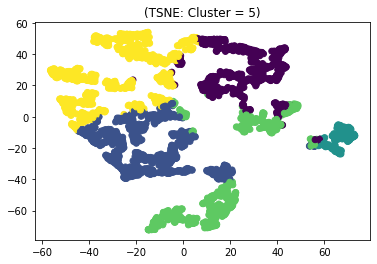

In [441]:
print('GMM MODEL \n==============')
for cluster in range(2,6):
    print('Number of Clusters:',cluster)
    print('================================')
    image_segmentation_gmm(normalized_matrix_plane,cluster)

### BIRD

GMM MODEL 
Number of Clusters: 2


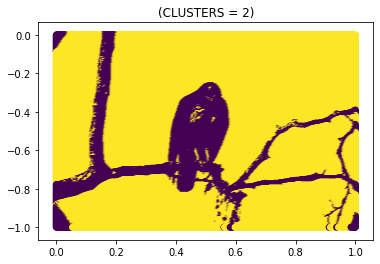

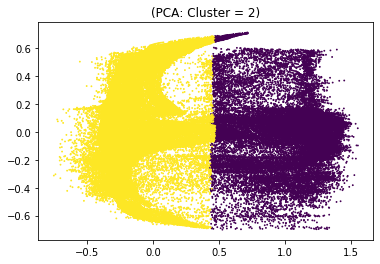

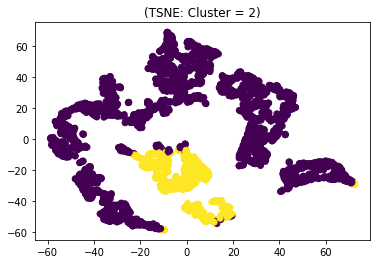

Number of Clusters: 3


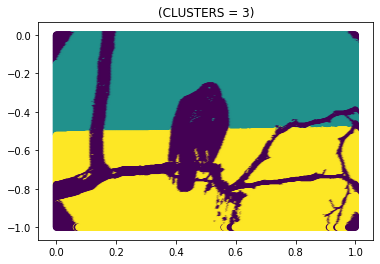

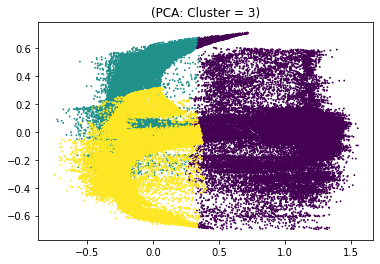

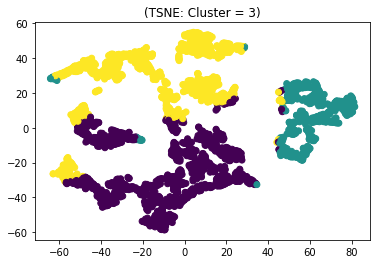

Number of Clusters: 4


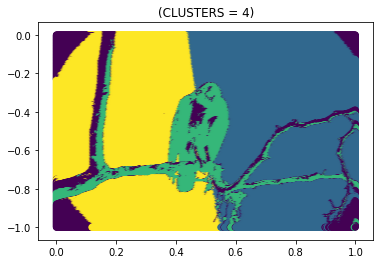

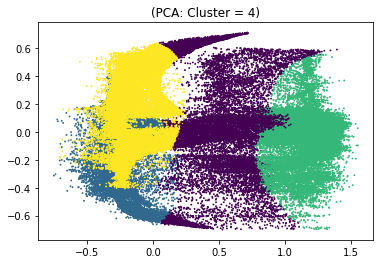

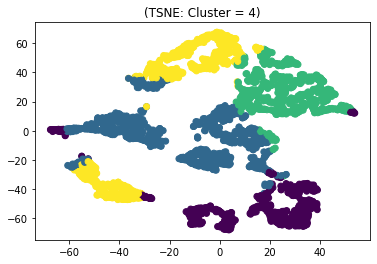

Number of Clusters: 5


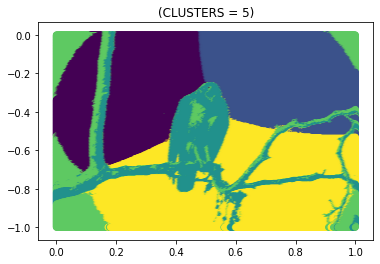

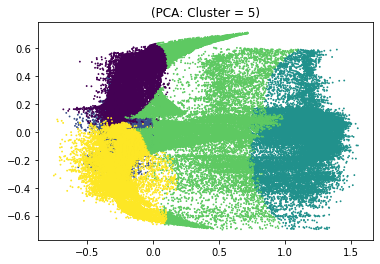

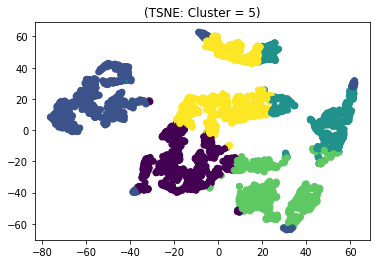

In [443]:
print('GMM MODEL \n==============')
for cluster in range(2,6):
    print('Number of Clusters:',cluster)
    print('================================')
    image_segmentation_gmm(normalized_matrix_bird,cluster)

##### LOG LIKELIHOOD AND NUMBER OF ITERATIONS

In [247]:
# print the converged log-likelihood value and iterations 
print('The converged log-likelihood value is {} and the number of iterations for convergence is {}:'
      .format(gmm_model.lower_bound_, gmm_model.n_iter_))

The converged log-likelihood value is 2.811444982487774 and the number of iterations for convergence is 3:


## Hierarchical Clustering
## First we apply `single linkage` as the method

- ### PLANE

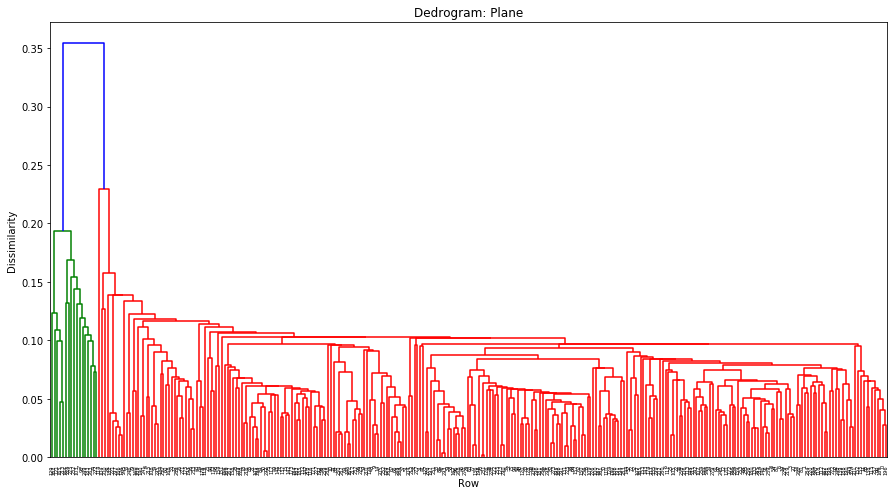

In [323]:
plt.figure(figsize=(15,8))
plt.title('Dedrogram: Plane')
plt.xlabel('Row')
plt.ylabel('Dissimilarity')
Dendrogram = scipy.cluster.hierarchy.dendrogram((scipy.cluster.hierarchy.linkage(normalized_matrix_plane.sample(300),method='single'))) 

- ### Bird

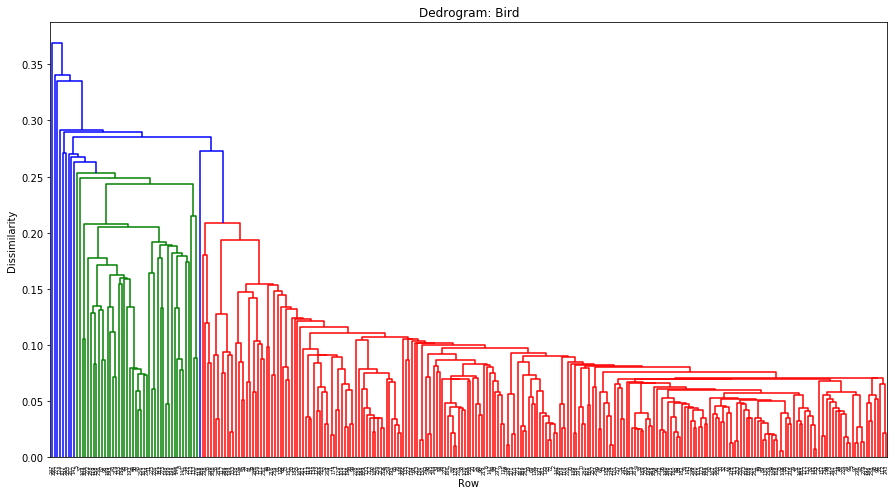

In [326]:
plt.figure(figsize=(15,8))
plt.title('Dedrogram: Bird')
plt.xlabel('Row')
plt.ylabel('Dissimilarity')
Dedrogram = scipy.cluster.hierarchy.dendrogram((scipy.cluster.hierarchy.linkage(normalized_matrix_bird.sample(300),method='single')))


In [84]:
data = normalized_matrix_plane.sample(50000)
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single')
model.fit(data)
labels = model.labels_

KeyboardInterrupt: 

In [91]:
def sil_score_hier_func(data,kmax):    
    sil = []
    cv = []
    # dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
    for k in range(2, kmax+1):
        hier_model = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')
        model_fit = hier_model.fit(data)
        labels = hier_model.labels_
        sil.append(silhouette_score(data, labels, metric = 'euclidean'))
        cv.append(calinski_harabasz_score(data,labels))
    return sil,cv

In [97]:
def plot_scores_hier(data,score_type):
    k=[2,3,4,5,6,7,8]
    plt.plot(k,sil_score_gmm.score,marker='o')
    plt.xticks(np.arange(min(k), max(k)+1, 1.0))
    plt.xlabel('k-value')
    plt.ylabel(score_type)
    plt.title('{} Vs K'.format(score_type))
    plt.grid()
    plt.show()

### PLANE

In [102]:
sil_score_plane_hier,ch_score_plane_hier = sil_score_hier_func(normalized_matrix_plane.sample(n=10000),8)
sil_score_hier = pd.DataFrame({'score':sil_score_plane_hier})
ch_plane_hier = pd.DataFrame({'score':ch_score_plane_hier})
print('Silhoutte Scores \n',sil_score_hier)
print('CH Scores \n',ch_plane_hier)


Silhoutte Scores 
       score
0  0.462005
1  0.250998
2 -0.083616
3 -0.211839
4 -0.211871
5 -0.213312
6 -0.227043
CH Scores 
       score
0  5.783729
1  3.970936
2  2.827688
3  2.388725
4  2.241128
5  2.282401
6  2.110007


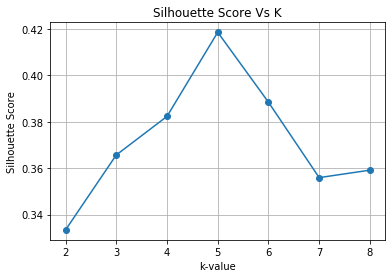

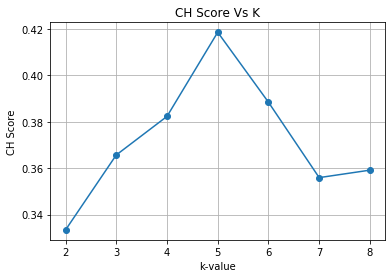

In [103]:
plot_scores_hier(sil_score_hier,'Silhouette Score')
plot_scores_hier(ch_plane_hier,'CH Score')

### BIRD

In [93]:
sil_score_bird_hier,ch_score_bird_hier = sil_score_hier_func(normalized_matrix_bird.sample(n=10000),8)

In [98]:
sil_score_hier_b = pd.DataFrame({'score':sil_score_bird_hier})
ch_plane_hier_b = pd.DataFrame({'score':ch_score_bird_hier})

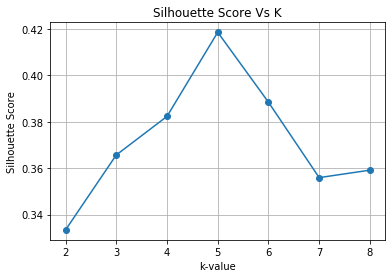

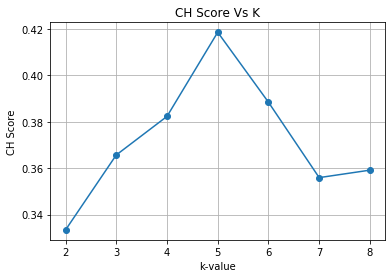

In [99]:
plot_scores_hier(sil_score_hier_b,'Silhouette Score')
plot_scores_hier(ch_plane_hier_b,'CH Score')

In [461]:
def image_segmentation_hier (data,n_cluster,c_type):
#     data_s = data.sample(sample_val)
    hier_model = AgglomerativeClustering(n_clusters=n_cluster, affinity='euclidean', linkage=c_type)
    model_fit = hier_model.fit(data)
    labels = hier_model.labels_
    plt.scatter(data.iloc[:,1],-1*data.iloc[:,0],c=labels)
    plt.title('(CLUSTERS = {})'.format(n_cluster))    
    plt.show()
    
    
#   PCA  STARTS HERE
    pca = PCA(n_components=2, random_state=0)
    reduced_features = pca.fit_transform(data)
    pca_fit= pd.DataFrame(data= {'pc1': reduced_features[:,0],'pc2': reduced_features[:,1]})
    plt.scatter(pca_fit['pc1'],pca_fit['pc2'],c=labels)
    plt.title('(PCA: Cluster = {})'.format(n_cluster))
    plt.show()
    
#   TSNE STARTS HERE
#     data_s2= data.sample(3500)
    gmm_model = GaussianMixture(n_components=n_cluster, covariance_type='spherical')
    model_fit = gmm_model.fit(data)
    labels = gmm_model.predict(data)
    model = TSNE(n_components = 2,random_state = 0, perplexity=35.0)
    t_data = model.fit_transform(data)
    df=pd.DataFrame()
    df['tsne1'] = t_data[:,0]
    df['tsne2'] = t_data[:,1]
    plt.scatter(df['tsne1'],df['tsne2'],c=labels)
    plt.title('(TSNE: Cluster = {})'.format(n_cluster))
    plt.show()



### PLANE

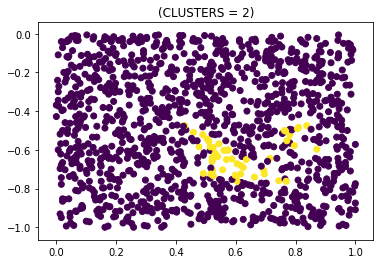

In [233]:
d = normalized_matrix_plane.sample(1200)
image_segmentation_hier(d,2,'single')

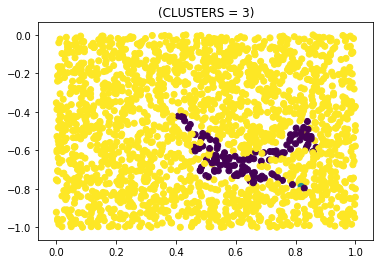

In [245]:
d = normalized_matrix_plane.sample(2100)
c_type='single'
image_segmentation_hier(d,3,c_type)

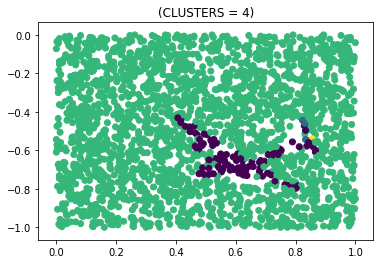

In [116]:
d = normalized_matrix_plane.sample(2400)
image_segmentation_hier(d,4,c_type)

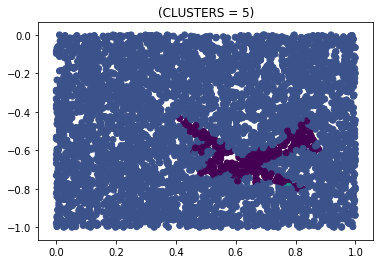

In [123]:
d = normalized_matrix_plane.sample(5000)
image_segmentation_hier(d,5,c_type)

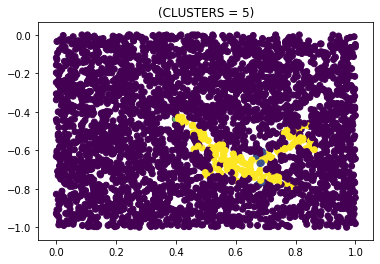

In [151]:
d = normalized_matrix_plane.sample(3500)
image_segmentation_hier(d,5,c_type)

## First we apply `single linkage` as the method
### BIRD

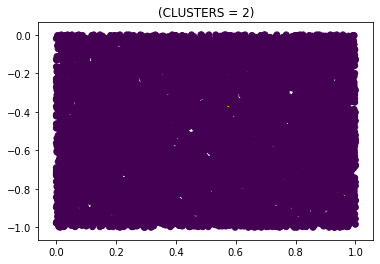

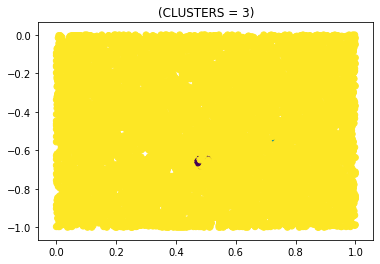

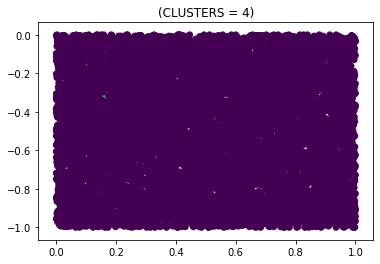

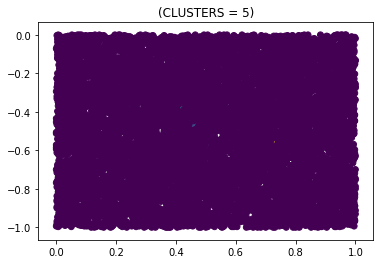

In [247]:
for k in range(2,6):
    d = normalized_matrix_bird.sample(10000)
    image_segmentation_hier(d,k,c_type)

## Second we apply `ward linkage` as the method to see if the retention improves

- ### PLANE

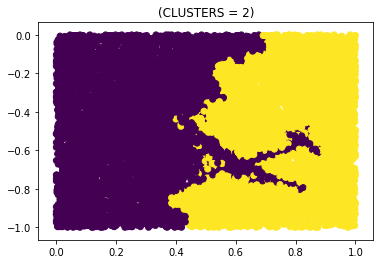

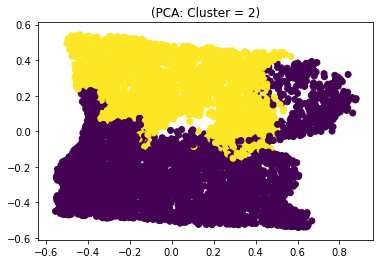

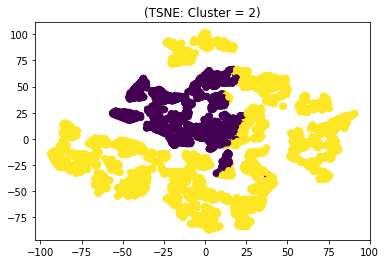

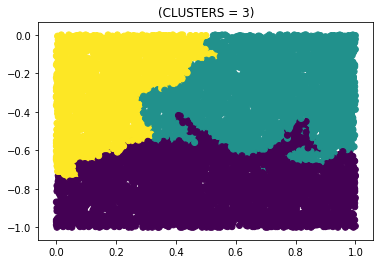

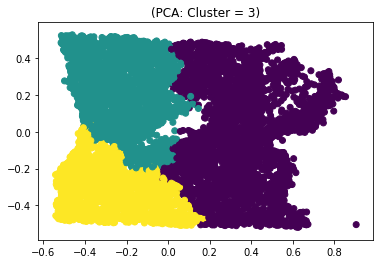

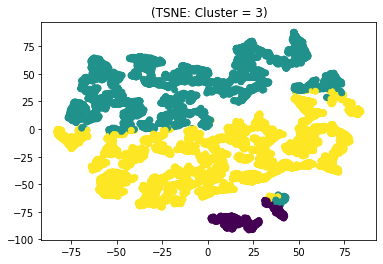

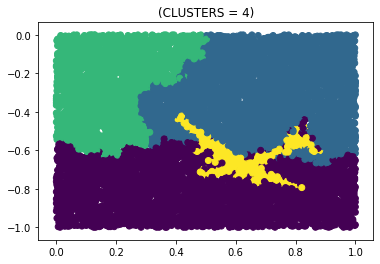

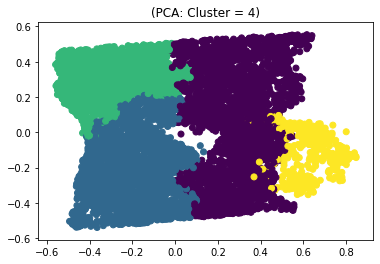

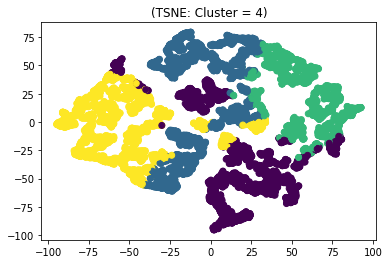

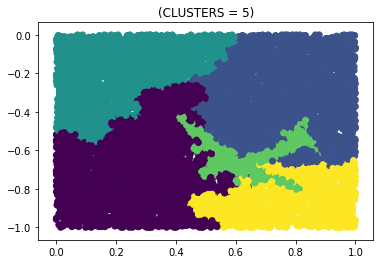

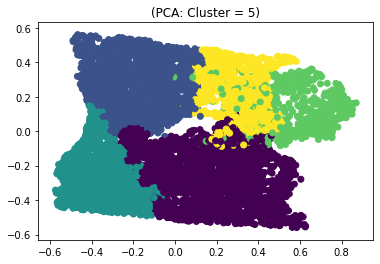

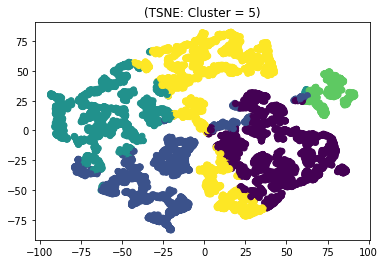

In [462]:
c_type='ward'
for k in range(2,6):
    d = normalized_matrix_plane.sample(10000)
    image_segmentation_hier(d,k,c_type)

- ### BIRD

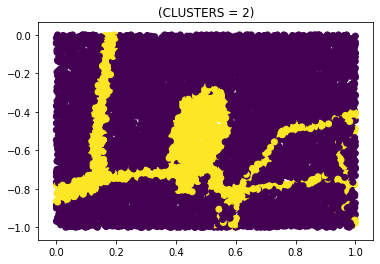

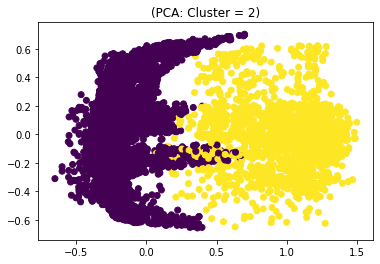

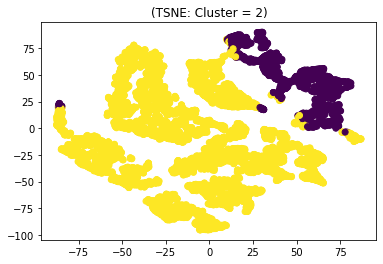

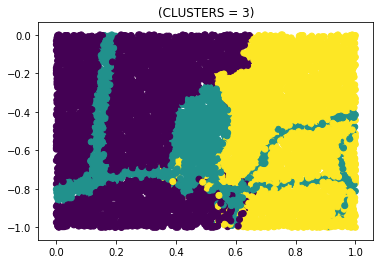

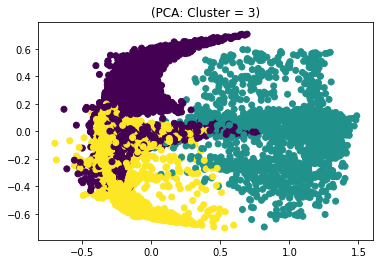

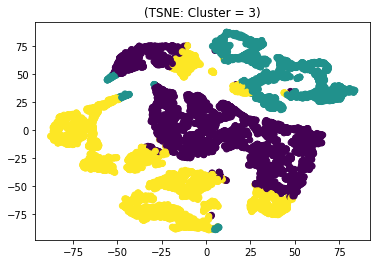

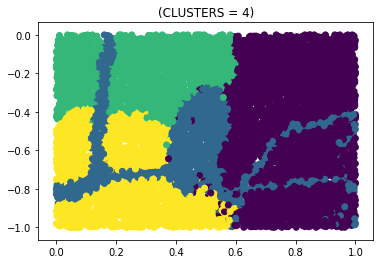

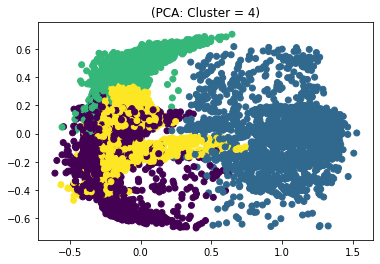

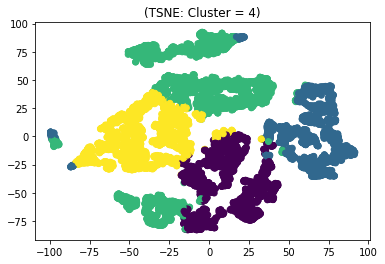

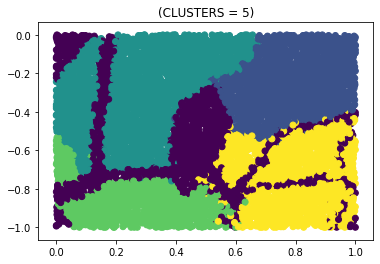

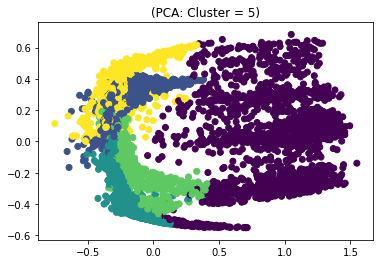

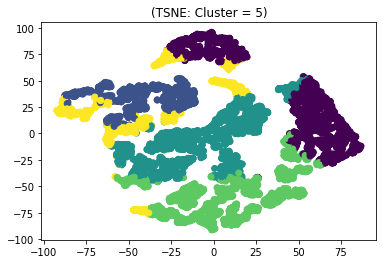

In [463]:
c_type='ward'
for k in range(2,6):
    d = normalized_matrix_bird.sample(10000)
    image_segmentation_hier(d,k,c_type)

- ### Dendrogram PLANE : Ward Linkage

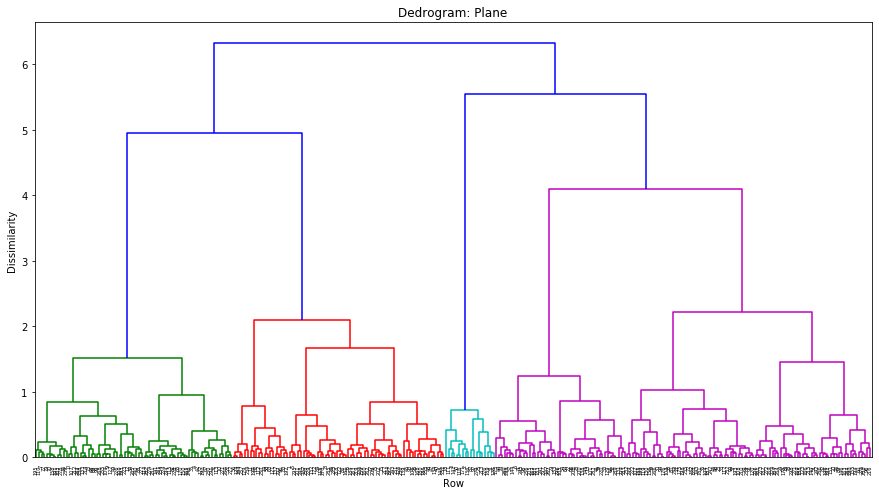

In [328]:
plt.figure(figsize=(15,8))
plt.title('Dedrogram: Plane')
plt.xlabel('Row')
plt.ylabel('Dissimilarity')
Dendrogram = scipy.cluster.hierarchy.dendrogram(
    (scipy.cluster.hierarchy.linkage(normalized_matrix_plane.sample(300),
     method='ward'))) 

- ### Dendrogram BIRD : Ward Linkage

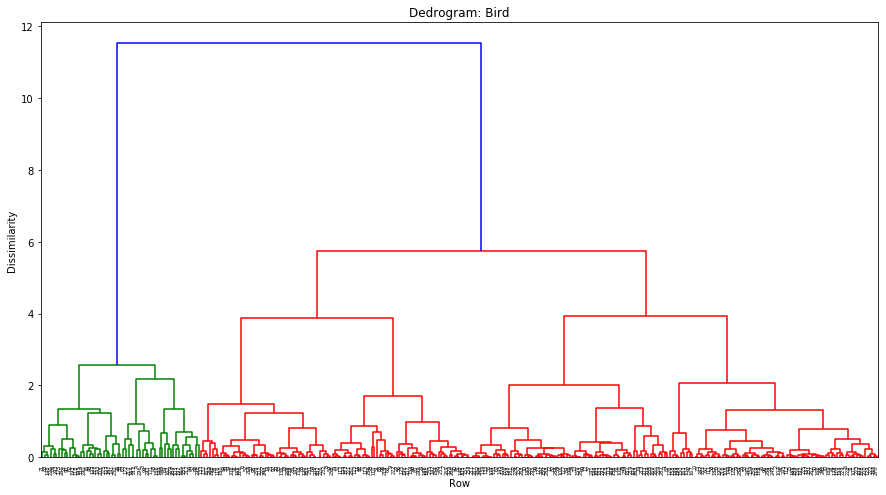

In [319]:
plt.figure(figsize=(15,8))
plt.title('Dedrogram: Bird')
plt.xlabel('Row')
plt.ylabel('Dissimilarity')
Dendrogram = scipy.cluster.hierarchy.dendrogram(
    (scipy.cluster.hierarchy.linkage(normalized_matrix_bird.sample(300),
     method='ward'))) 
